In [2]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_groq import ChatGroq
from dotenv import load_dotenv
import os
load_dotenv()


True

In [3]:

model = ChatGroq(
    model="llama3-8b-8192",  # ✅ REQUIRED
    temperature=0.7
)


In [4]:
# Define the State
class BlogState(TypedDict):
    title : str
    outline : str
    content : str

In [8]:
def create_outline(state : BlogState) -> BlogState:
    title = state['title']
    prompt = f'Generate a detailed outline for a blog on the topic {title}'
    outline = model.invoke(prompt).content
    state['outline'] = outline
    return state

def generate_content(state : BlogState) -> BlogState:
    title = state['title']
    outline = state['outline']
    prompt = f'Write a detaild blog on the title {title} Based on the following outline \n {outline}.'
    content = model.invoke(prompt).content
    state['content'] = content
    return state



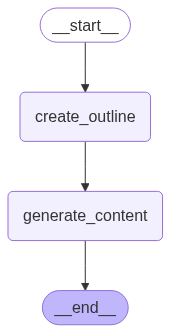

In [9]:
graph = StateGraph(BlogState)

graph.add_node('create_outline',create_outline)
graph.add_node('generate_content', generate_content)

# Add edges
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline','generate_content')
graph.add_edge('generate_content',END)

# 
workflow = graph.compile()
workflow

In [11]:
intial_state = {'title' : 'Earth Resources vs Population'}
final_state = workflow.invoke(intial_state)
print(final_state['outline'])

Here is a detailed outline for a blog on the topic "Earth Resources vs Population":

**I. Introduction**

* Brief overview of the importance of the topic
* Thesis statement: The growing global population is putting a strain on the Earth's resources, and it's essential to understand the impact and find sustainable solutions.

**II. The State of the Earth's Resources**

* Overview of the Earth's natural resources, including:
	+ Water
	+ Food
	+ Energy (fossil fuels, renewable energy sources)
	+ Land
	+ Minerals
* Statistics and facts highlighting the depletion and degradation of these resources

**III. The Impact of Population Growth on Earth's Resources**

* Discussion of how population growth is affecting the availability of Earth's resources, including:
	+ Water scarcity and competition for access
	+ Food insecurity and the need for increased agricultural production
	+ Energy shortages and the reliance on fossil fuels
	+ Land degradation and deforestation
	+ Increased demand for miner

In [12]:
print(final_state['content'])

**Earth Resources vs Population: A Growing Concern for a Sustainable Future**

The world is facing a critical challenge: an ever-growing population is putting a strain on the Earth's resources, threatening the very foundation of our existence. The increasing demand for natural resources, such as water, food, energy, land, and minerals, is outpacing the planet's ability to replenish them, leading to depletion, degradation, and environmental disasters. In this blog, we will delve into the state of the Earth's resources, the impact of population growth on these resources, the consequences of inaction, and potential sustainable solutions to address this pressing issue.

**The State of the Earth's Resources**

The Earth's natural resources are finite and non-renewable. Water, the most essential resource, is being depleted at an alarming rate. According to the World Wildlife Fund (WWF), nearly 2 billion people live in water-scarce areas, and by 2025, half of the world's population will be li